<a href="https://colab.research.google.com/github/dibkb/tensorflow-udemy/blob/main/Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [3]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-12-13 14:57:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.207, 173.194.212.207, 142.251.162.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   196MB/s    in 0.8s    

2023-12-13 14:57:55 (196 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [4]:
# Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [20]:
import tensorflow as tf
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
SEED = 42
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,

                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode = "categorical",
                                                                 image_size=IMAGE_SIZE,seed = SEED)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,

                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode = "categorical",
                                                                 image_size=IMAGE_SIZE,seed = SEED)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [28]:
print("Classnames available \n")
for name in train_data.class_names:
  print(name)

Classnames available 

chicken_curry
chicken_wings
fried_rice
grilled_salmon
hamburger
ice_cream
pizza
ramen
steak
sushi


In [59]:
import matplotlib.pyplot as plt
import random
def plotrandom():
  take = random.randint(1, int(750/BATCH_SIZE))
  for images, labels in train_data.take(take):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 16))
    for i in range(3):
        for j in range(3):
            axes[i, j].imshow(images[i * 3 + j]/255.,)
            axes[i, j].axis('off')  # Disable axes
    return


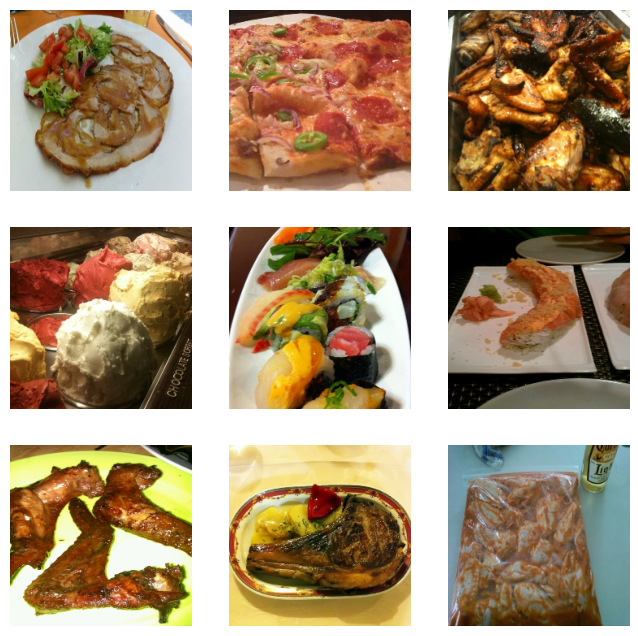

In [58]:
plotrandom()